In [1]:
using FFTW, Plots, NAJ, LaTeXStrings, Images, TestImages

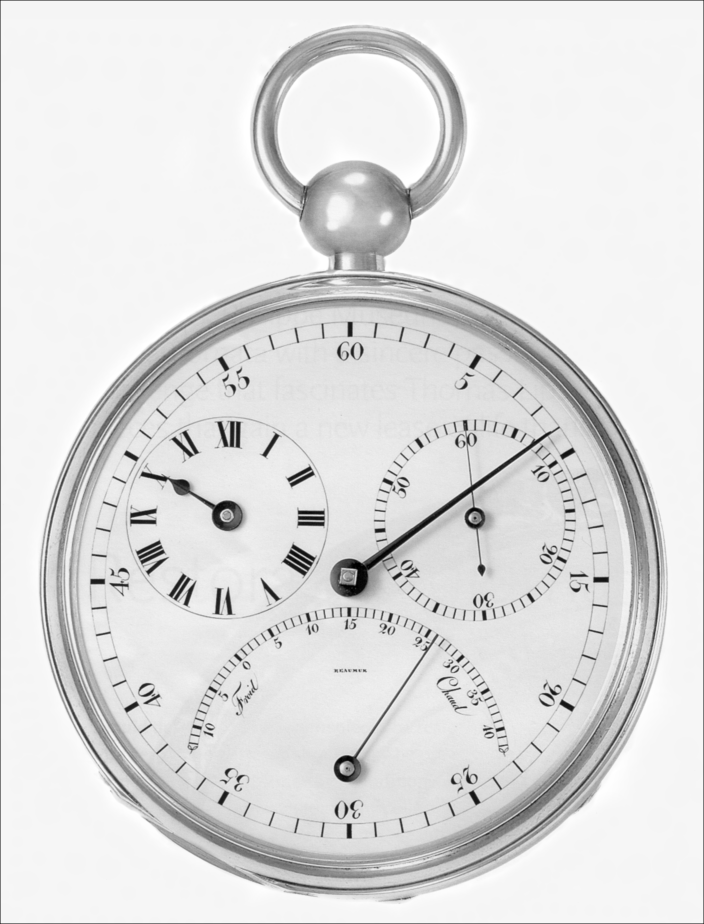

In [11]:
img = testimage_dip3e("Fig0220(a)")

In [18]:
q=fft(Float64.(img))

3692×2812 Matrix{ComplexF64}:
 9.08473e6+3.70051e-10im  2.55239e5-39610.7im    …  2.55239e5+39610.7im
  2.1871e5-1.88177e5im      49188.6-46834.4im         34849.1-71501.7im
  -32402.9-72626.8im       -8177.42+44725.1im        -21562.8+54823.9im
   44991.0-72873.8im        57049.1+1.01419e5im       40817.3+75599.7im
   94203.6+7976.0im        -60011.2+10440.2im        -59696.0+6686.27im
  -2356.17-8242.65im       -14715.7+20280.7im    …    -3268.8+10830.7im
   29250.1+28216.8im       -32534.2-19767.9im        -4179.67-11795.9im
   80080.7+38594.2im       -65198.9-21579.9im        -63172.0-19182.7im
   15871.7-21601.1im       -39197.6+16715.9im        -49221.7+27084.0im
   16544.8-3870.82im       -14440.4-5460.64im        -10826.9-4941.14im
          ⋮                                      ⋱  
   16544.8+3870.82im       -10826.9+4941.14im        -14440.4+5460.64im
   15871.7+21601.1im       -49221.7-27084.0im        -39197.6-16715.9im
   80080.7-38594.2im       -63172.0+19182.7im    …   

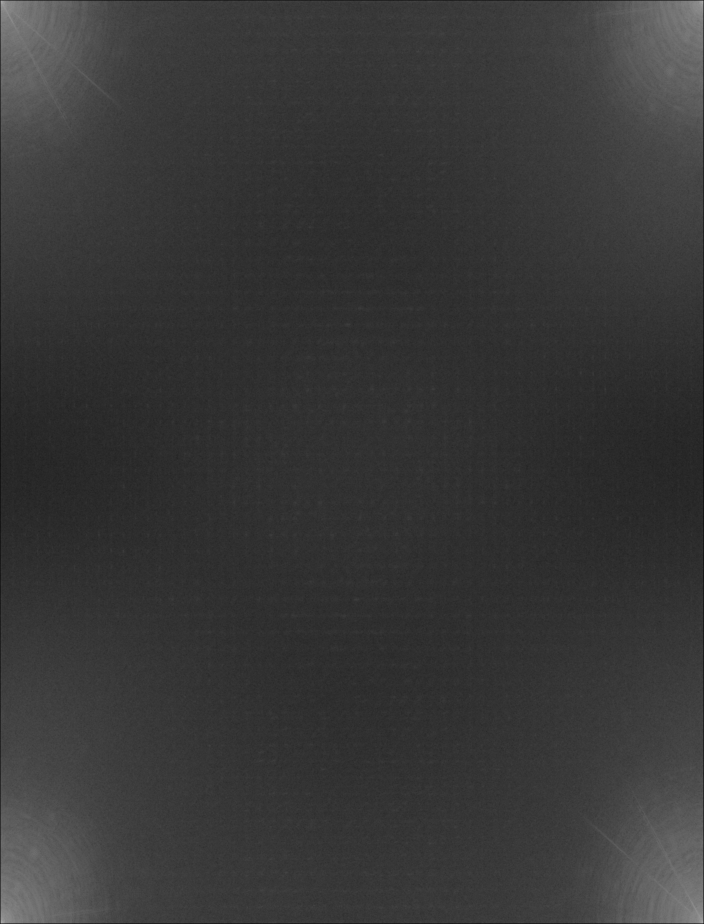

In [21]:
qs = log.(abs.(q) .+ 1.0)
qm, qM = extrema(qs)
fimg = (qs .- qm)./(qM-qm)
Gray.((qs .- qm)./(qM-qm))

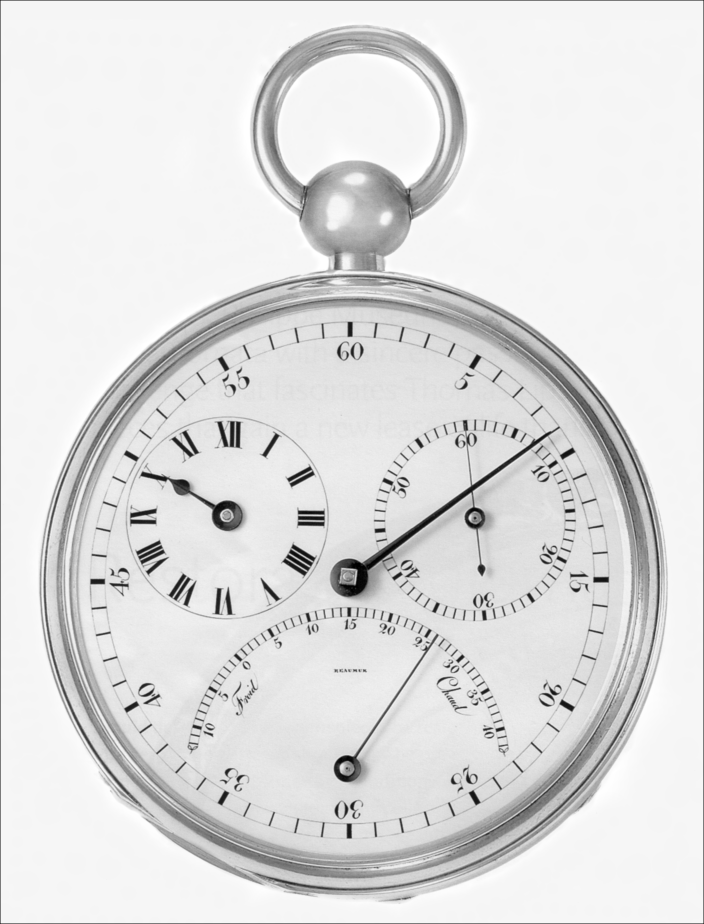

In [23]:
ifimg = real.(ifft(q))
pm, pM = extrema(ifimg)
Gray.((ifimg .- pm)./(pM-pm))


In [ ]:
dt=0.1
t = 0:dt:9.95
y = sin.(1*π* t) + 2* sin.(2*π * t) .+ 5.0 .* t .* exp.(-(t.-3.0).^2 ./(10.0))
p1 = plot(t, y, label = L"f", lw=2, size=(600, 300), frame = :box, title = L"\sin (\pi t) + \sin (2 \pi t) + 5t e^{-(t-3)^2/10}")
fy1 = dft(y)
freq = fftfreq(length(t), 10)
u = (1:length(y))*2*π
p2 = plot(freq, abs.(fy1), marker = :circle, color=:red, lw=2, ylim=(-5, 920), size=(600, 300), frame = :box, label = L"|\mathfrak{F}[f]|")
p3 = plot(t,real.(idft(fy1)), lw=2, frame = :box, label = L"\mathfrak{F}^{-1}[\mathfrak{F}[f]]")
plot(p1, p2, p3, layout = (1, 3), size=(900, 300))

In [ ]:
p2 = scatter((1:length(y)), abs.(fy1), color=:red, frame = :box, label = "FFT")

In [ ]:
function four_rect(u)
    if abs(u)<1.0e-10
        return one(u)
    else
        return sin(π * u )/(π * u)
    end
end
t = -1:0.01:1
f = zeros(length(t))
f[abs.(t).<0.5] .= 1.0
p1=plot(t, f, xticks =([-0.5, 0, 0.5], [L"-w/2", L"0", L"w/2"]), lw=2, lc=:red, label = L"f(t)")
t2 = -10:0.01:10
p2 = plot(t2, four_rect.(t2), xticks =([-5, 0, 5], [L"-5/w", L"0", L"5/w"]), lc = :blue, lw=2, label = L"F(u)")
p3 = plot(t2, abs.(four_rect.(t2)), xticks =([-5, 0, 5], [L"-5/w", L"0", L"5/w"]), lc = :green, lw=2, label = L"|F(u)|")


plot(p1, p2, p3, layout=(1, 3), size = (1000, 400), dpi=300)

#savefig("fourier_of_rect.png")

In [ ]:
A= zeros(Float64, (256, 256))
for x ∈ 1:256, y ∈ 1:256
    xp, yp = 32*round(x/32), 32*round(y/32)
    if (x-xp)^2 + (y-yp)^2 < 8
        A[x, y] = 1.0
    end
end

p1=heatmap(A, aspect_ratio = :equal, size=(600, 400), title= L"f")
Af = fft(A)
p2 = heatmap(log10.(abs.(Af) .+ 1.0), aspect_ratio = :equal, size= (600, 400), title = L"\log (\textrm{abs}(\mathfrak{F}[f]) +1)")

plot(p1, p2)


In [ ]:
x, y =825, 769
p, yp = 64*round(x/64), 64*round(y/64)

In [ ]:
extrema(abs.(Af))

In [ ]:
fft([1,1,1,1,1])

In [ ]:
ifft(fft([0,0,1,0,0]))

In [ ]:
ifft(fft([1,0,0,0,0]))

In [ ]:
length(t)